In [5]:
# ChatGPT WAS USED acting as a quick researching tool. Most codes are written by myself

# Importing Libraries
import pandas as pd
import numpy as np 

import matplotlib.pyplot as plt
import seaborn as sns

# Reading the Data
spotify = pd.read_csv('/Users/emily/Test/spotify_tracks-1.csv')

# Display a few lines from the dataframe
spotify.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


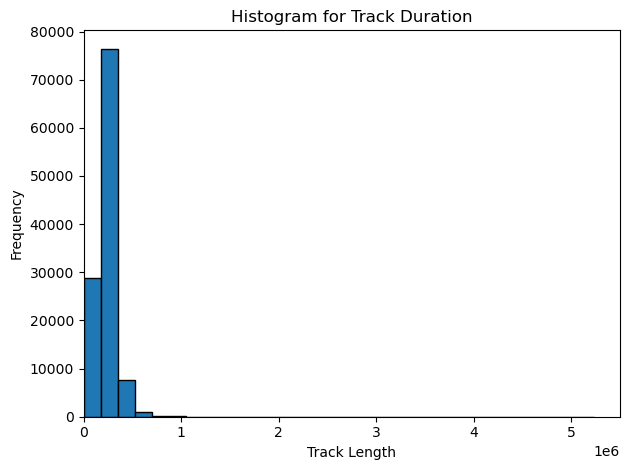

In [6]:
# Plotting the Histogram for Track Duration
plt.hist(spotify['duration_ms'], bins = 30, edgecolor = 'black')

# Labeling the plot
plt.xlabel('Track Length')
plt.ylabel('Frequency')
plt.title('Histogram for Track Duration')

# Set x to start from 0
plt.xlim(left=0)

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

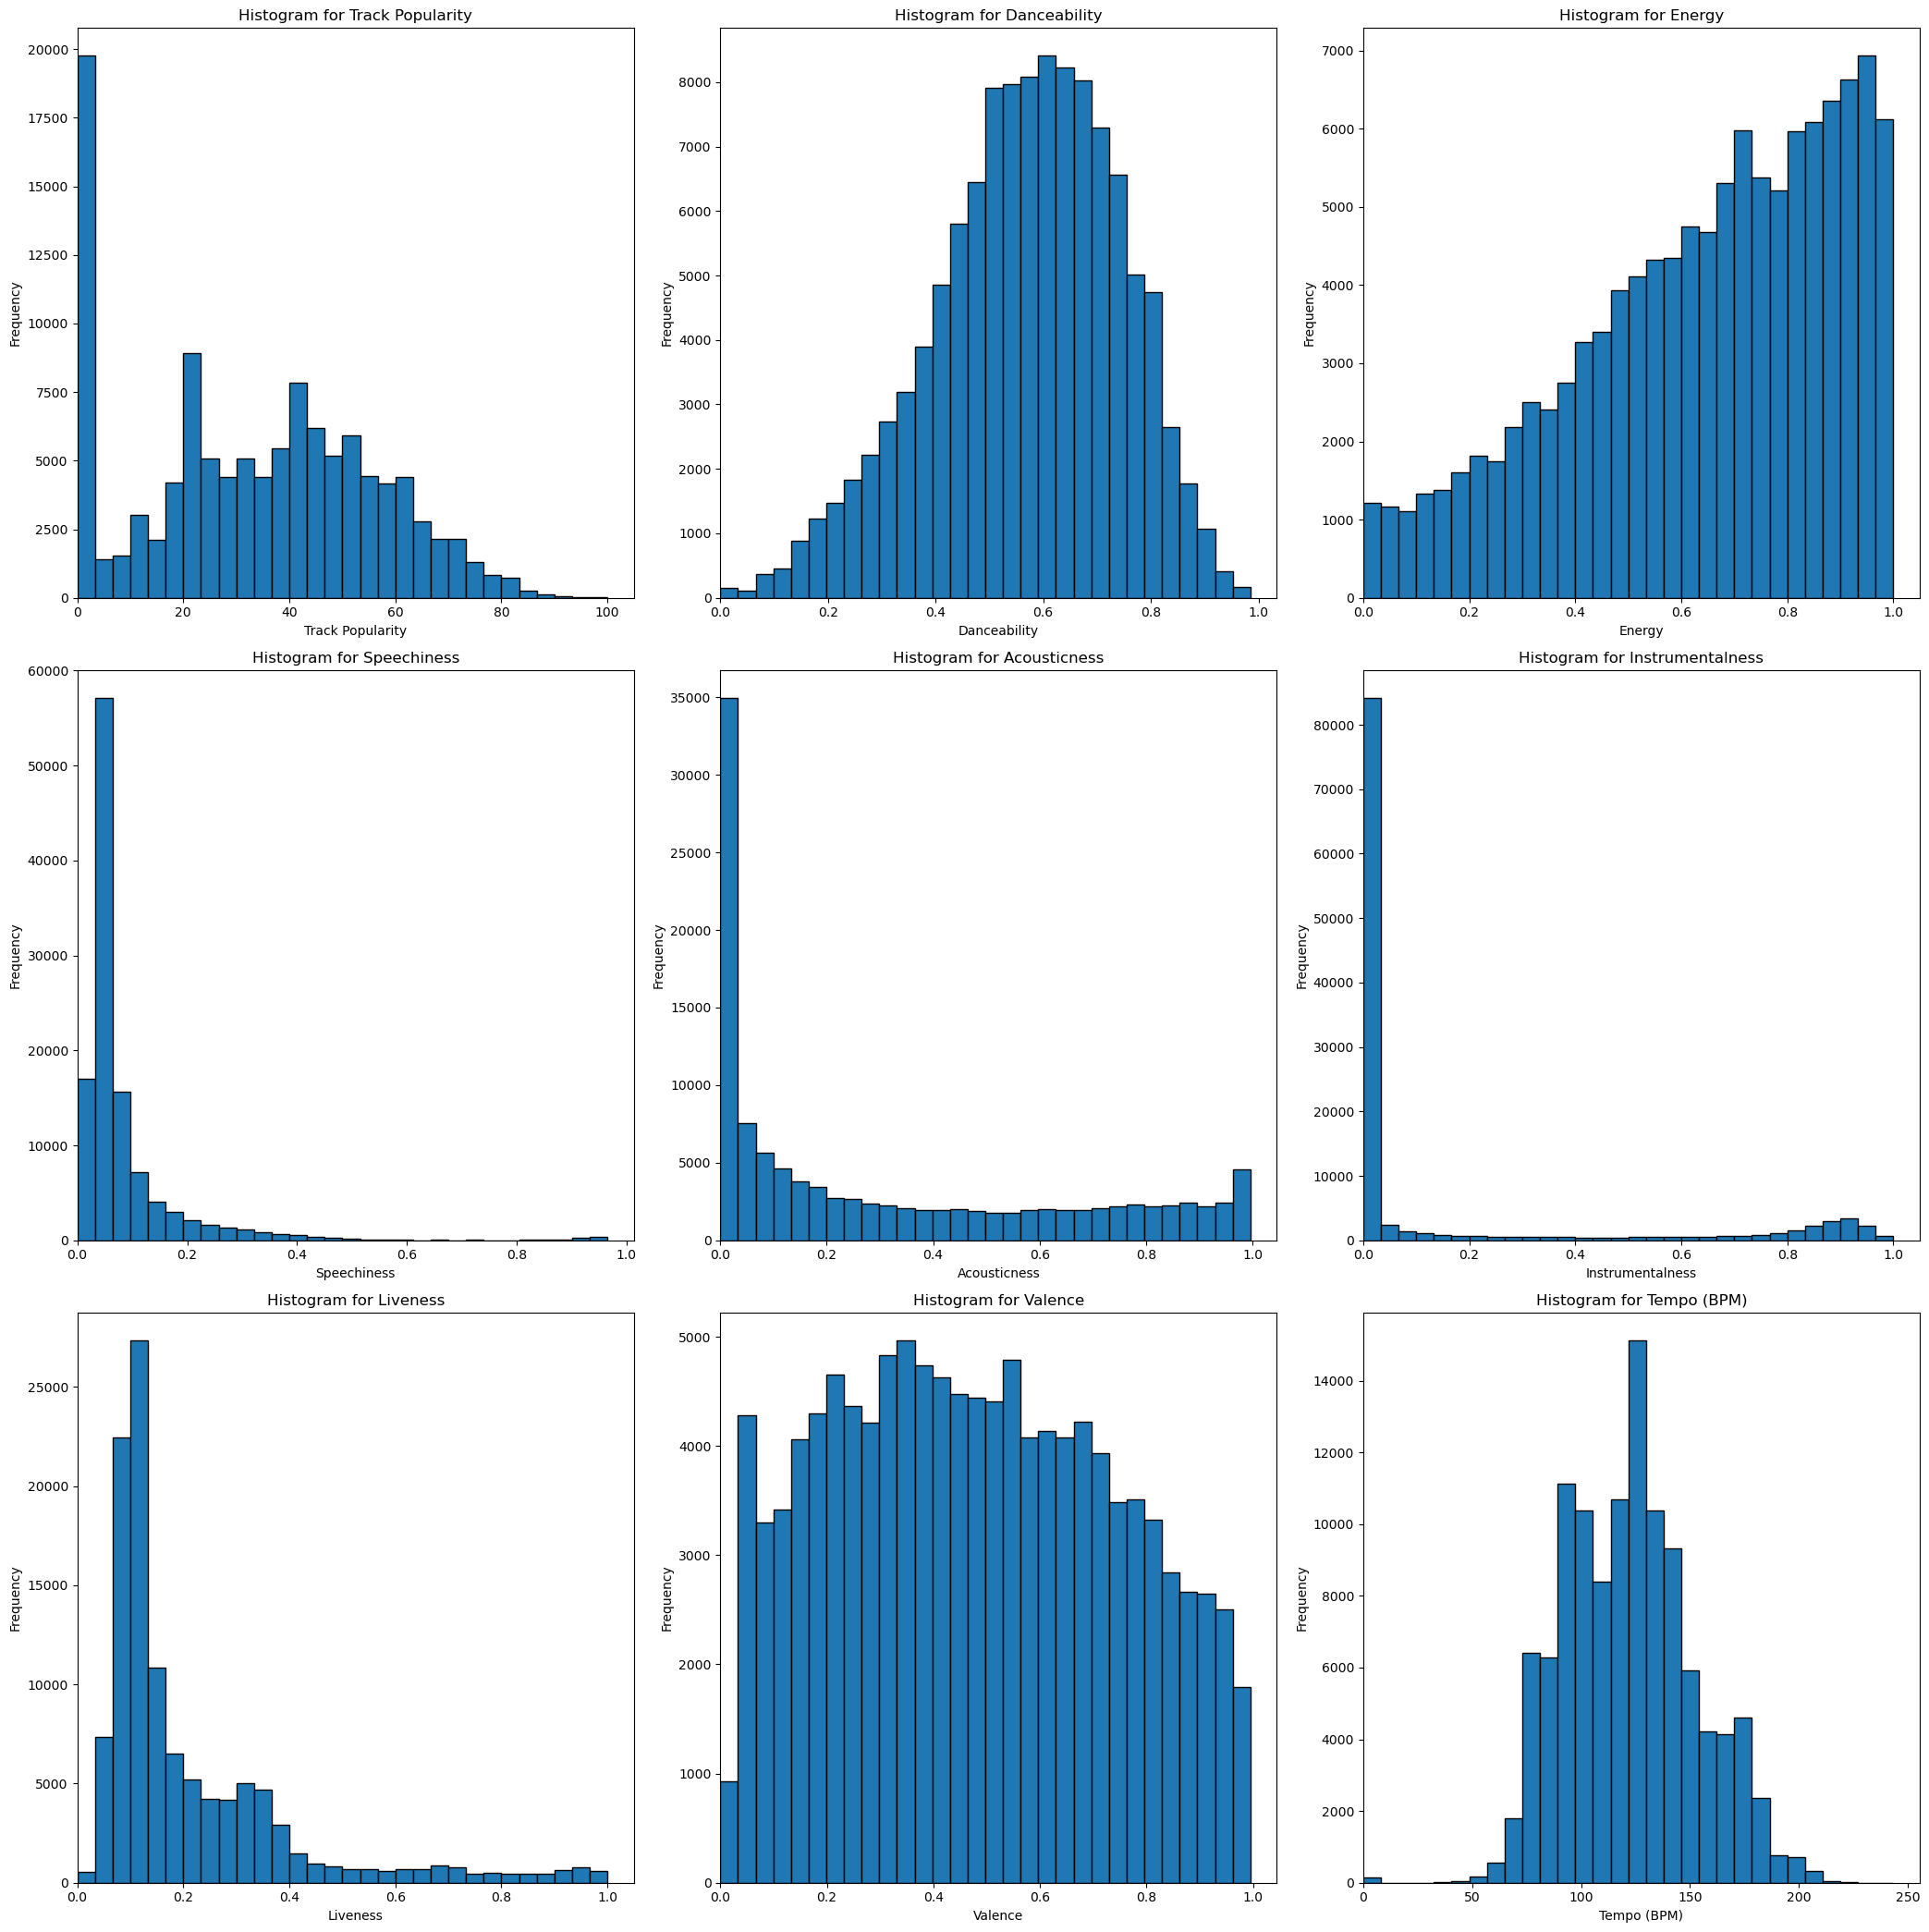

In [7]:
# Updated list of features to plot histograms for
updated_features = ['popularity', 'danceability', 'energy', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo']

# Titles for the plots
updated_titles = ['Track Popularity', 'Danceability', 'Energy', 'Speechiness', 'Acousticness', 
                  'Instrumentalness', 'Liveness', 'Valence', 'Tempo (BPM)']

# Make the canvas size larger
plt.figure(figsize=(21, 21))

# Loop through the updated features and create subplots
for i, feature in enumerate(updated_features):
    plt.subplot(3, 3, i + 1)
    plt.hist(spotify[feature], bins=30, edgecolor='black')
    plt.xlabel(updated_titles[i])
    plt.ylabel('Frequency')
    plt.xlim(left=0)
    plt.title(f'Histogram for {updated_titles[i]}')

plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Correlation Matrix Heatmap with Numerical Only Data')

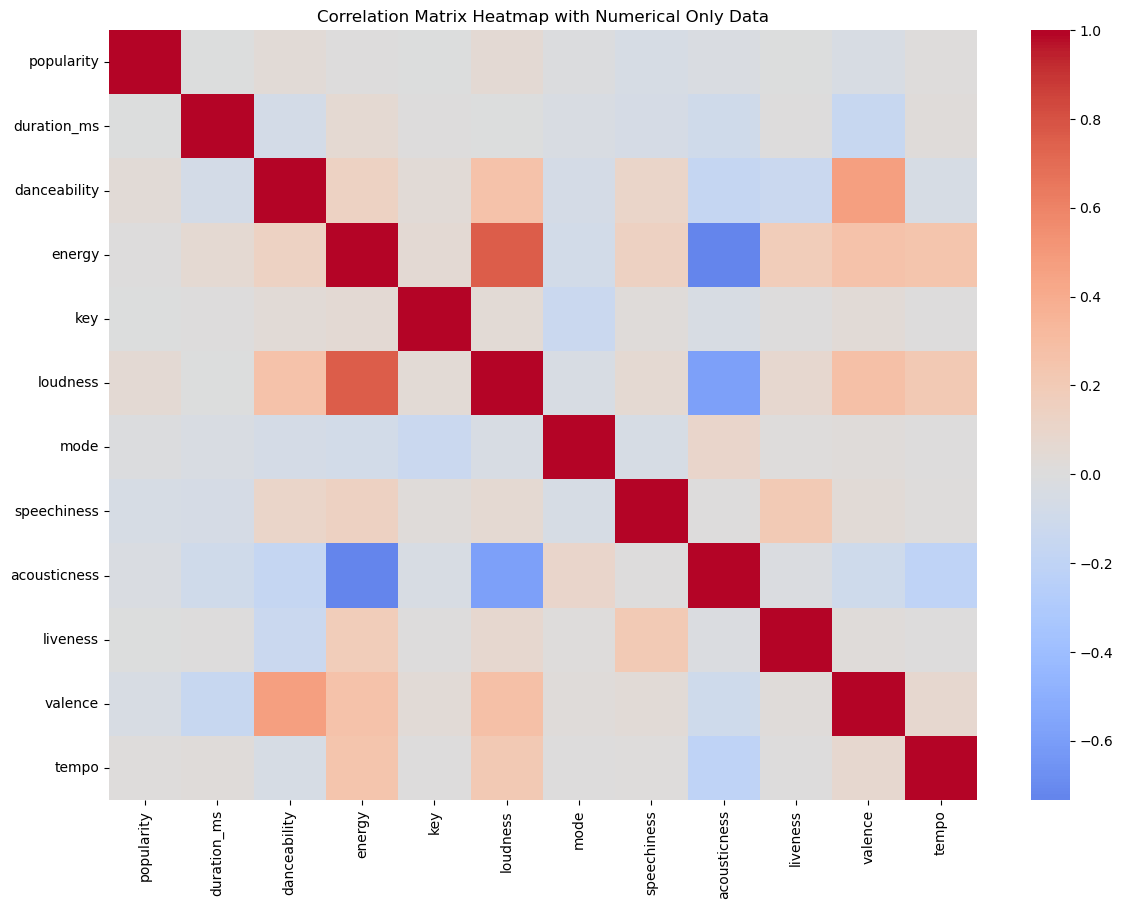

In [8]:
# Removing the columns with texts
text_columns = ['track_id', 'artists', 'album_name', 'track_name', 'explicit', 'time_signature', 'track_genre', 'instrumentalness', 'Unnamed: 0']
spotify_change1 = spotify.drop(columns = text_columns)

# Calculate the correlation matrix for the entire dataset
correlation_matrix = spotify_change1.corr()

# Display heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Correlation Matrix Heatmap with Numerical Only Data')

In [9]:
# Extract the correlation between the variables that is significant
loudness_danceability = correlation_matrix.loc['loudness', 'energy']
acousticness_energy = correlation_matrix.loc['acousticness', 'energy']

# Outputting the correlations
(loudness_danceability, acousticness_energy)

(0.7616899598908227, -0.7339063209687007)

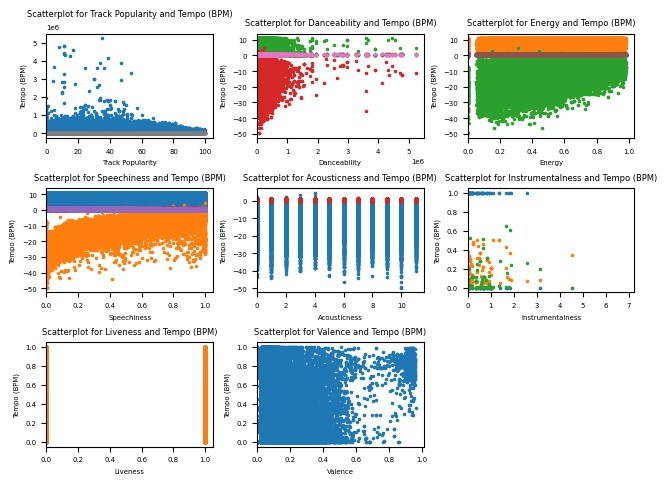

In [10]:
# Loop through the updated features and create subplots
plt.rcParams['font.size'] = 5
for i in range (9):
    for j in range (9):
        if i < j:
            plt.subplot(3, 3, i + 1)
            plt.scatter(spotify_change1.iloc[:, i], spotify_change1.iloc[:, j], marker='.', s=10)
            plt.xlabel(updated_titles[i])
            plt.ylabel(updated_titles[j])
            plt.xlim(left=0)
            plt.title(f'Scatterplot for {updated_titles[i]} and {updated_titles[j]}')

plt.tight_layout()
plt.show()

In [11]:
# Identify outliers:
# Removing outliers can reduce the noise of the dataset and help the model focus on main correlations.
# I chose IQR over z-score because IQR is also suitable for datasets that are not randomly distributed.
# I tried merging both methods but resulted in data overfitting.

In [12]:
# Identify outliers using the IQR method
def remove_IQR(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df

spotify_cleaned = remove_IQR(spotify, spotify_change1)
spotify_cleaned.head()

# This method identifies data that does not fall within lower/upper bounds as outliers and removes them.
# The multiplier of 1.5 is used.

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.461,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.359,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.443,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.481,...,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.147,...,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic


In [13]:
from scipy.stats import shapiro

# Normality test using Shapiro-Wilk test shows that removing outliers can improve data quality
stat_before, p_before = shapiro(spotify['energy'])
stat_after, p_after = shapiro(spotify_cleaned['energy'])

print(f"Before Outlier Removal: {stat_before:.4f} ({p_before:.4f})")
print(f"After Outlier Removal: {stat_after:.4f} ({p_after:.4f})")

Before Outlier Removal: 0.9458 (0.0000)
After Outlier Removal: 0.9549 (0.0000)


/opt/anaconda3/lib/python3.11/site-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


In [14]:
# Clustering:

In [15]:
# Select only necessary features for clustering
spotify_clustering = spotify_cleaned[["acousticness","danceability","energy","instrumentalness","liveness","speechiness","valence"]]
plt.rcParams['font.size'] = 10

In [16]:
# KMeans model:
# Find number of clusters
# Train model
# Assign cluster number 
# Recommendations

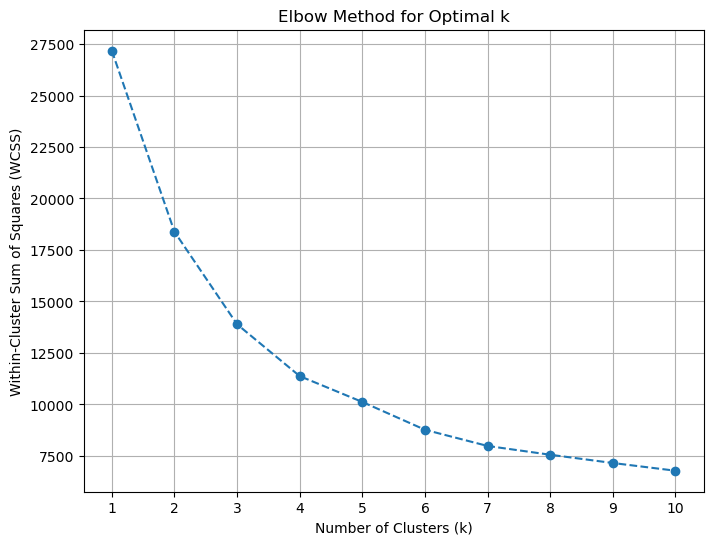

In [17]:
# Use the elbow method to determine the number of clusters we want.
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(spotify_clustering)
    wcss.append(kmeans.inertia_)

# Plotting the elbow method
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.title('Elbow Method for Optimal k')
plt.xticks(range(1, 11))
plt.grid()
plt.show()

In [ ]:
# Use silhouette analysis to determine the number of clusters we want.
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmeans.fit(spotify_clustering)
    score = silhouette_score(spotify_clustering, kmeans.labels_)
    silhouette_scores.append(score)

# Plotting silhouette scores
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o', linestyle='--')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis for Optimal k')
plt.xticks(range(2, 11))
plt.grid()
plt.show()

In [ ]:
# The results shows that the optimized cluster number should be 3.
kmeans = KMeans(n_clusters=3, n_init=10, random_state=42)
kmeans.fit(spotify_clustering)

In [ ]:
# DBSCAN:
# Find eps and minpts
# Train model
# Recommendations

In [ ]:
def select_MinPts(data,k):
    k_dist = []
    for i in range(data.shape[0]):
        dist = (((data.iloc[i] - data)**2).sum(axis=1)**0.5)
        dist.sort_values()
        k_dist.append(dist[k])
    return np.array(k_dist)
k = 13
k_dist = select_MinPts(spotify_clustering,k)
k_dist.sort()
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])

In [ ]:
y=5000
eps = k_dist[::-1][y]
min_samples = 14
plt.plot(np.arange(k_dist.shape[0]),k_dist[::-1])
plt.scatter(y,eps,color="r")
plt.plot([0,y],[eps,eps],linestyle="--",color = "r")
plt.plot([y,y],[0,eps],linestyle="--",color = "r")
plt.show()

In [2]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=eps, min_samples=min_samples)
dbscan.fit(spotify_clustering)

NameError: name 'eps' is not defined

In [ ]:
spotify_clustering.loc[:, "KMeans"] = kmeans.labels_

In [ ]:
spotify_clustering.loc[:, "DBSCAN"] = dbscan.labels_

In [ ]:
spotify_clustering["KMeans"]

In [ ]:
spotify_clustering["DBSCAN"]

In [ ]:
spotify_clustering.shape

In [ ]:
spotify_clustering.head()

In [ ]:
# Save the dataframe with cluster information as a new CSV file
spotify_clustering.to_csv("result.csv", index=False)

# Load the updated data with cluster info
tracks = pd.read_csv("result.csv")

In [ ]:
ids = input('Enter comma-separated ids of your favorite songs\n> ').strip().split(',')
ids = [int(id.strip()) for id in ids]
print("Entered IDs:", ids)

In [ ]:
favorites = tracks[tracks['UID'].isin(ids)]

In [ ]:
# Find out the most frequent cluster among the user's favorite songs
clusters = favorites['type'].value_counts()
user_favorite_cluster = clusters.idxmax()

print('\nFavorite cluster:', user_favorite_cluster, '\n')

In [ ]:
# Get the songs that belong to the user's favorite cluster
suggestions = tracks[tracks['type'] == user_favorite_cluster]

# Print the first 5 song suggestions
suggestions.head()